In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import ShapleyIndices, ShapleyKrigingIndices, SobolKrigingIndices
from shapley.tests import Ishigami, AdditiveGaussian
from shapley.plots import set_style_paper, plot_sensitivity_results
from shapley.base import ProbabilisticModel 
from shapley.kriging import KrigingModel

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = True
ylim = [-0.1, 1.]

In [2]:
if False:
    mu_betas = [2.468E11, 2.182e11,1.053e11,1.485e11]
    sigma_betas = [6.17e9, 5.455e9, 2.6325e9, 3.7125e9]
    bounds_low = [2.35E11, 2.07E11, 1.00E11, 1.41E11]
    bounds_up = [2.59E11, 2.29E11, 1.10E11, 1.55E11]
else:
    mu_betas = [246.8, 218.2,105.3,148.5]
    sigma_betas = [6.17, 5.455, 2.6325, 3.7125]
    bounds_low = [235, 207, 100, 141]
    bounds_up = [259, 229, 110, 155]
    
mu_normal = [35, 18, 14, 11, 8, 1, -31]
sigma_normal = [5, 5, 5, 5, 5, 5, 5]


margins = []
for mu, sigma, a, b in zip(mu_betas, sigma_betas, bounds_low, bounds_up):
    dist = ot.Beta()
    dist.setParameter(ot.BetaMuSigma()([mu, sigma, a, b]))
    margins.append(dist)
    
for mu, sigma in zip(mu_normal, sigma_normal):
    margins.append(ot.Normal(mu, sigma))
    
mu = np.asarray(mu_betas + mu_normal)
sigma = np.asarray(sigma_betas + sigma_normal)
dim = len(mu)

In [3]:
correlation = ot.CorrelationMatrix(pd.read_csv('./data/correlation.csv', sep=',', header=None).values)
copula = ot.NormalCopula(correlation)
input_distribution = ot.ComposedDistribution(margins, copula)

In [4]:
data = pd.read_csv('./data/results_unif.txt', sep=' ', header=None, usecols=range(dim+1))
#data = pd.read_csv('./data/results.txt', sep=' ', header=None, usecols=range(dim+1))
X = data.values[:, :dim]
y = data.values[:, 11]
X[:, :4] /= 1E9
#X = (X - mu) / sigma
y = (y - y.mean()) / y.std()

In [5]:
%%time
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
library = 'OT'
basis = 'quadratic'
kernel = 'matern'
with_loo = True

meta_model = KrigingModel(model=lambda x: None, input_distribution=input_distribution)
meta_model.input_sample = X
meta_model.output_sample = y
meta_model.build(library=library, basis_type=basis, kernel=kernel)
if with_loo:
    score_q2_loo = meta_model.compute_score_q2_loo()
    print('Leave One Out Q2 score:', score_q2_loo)
shapley_kriging = ShapleyKrigingIndices(input_distribution)

Leave One Out Q2 score: 0.468923066998
Wall time: 50min 38s


In [6]:
Nv = 5000
Ni = 50
No = 3
n_perms = 1000
n_realization = 300
max_budget = Nv + No * Ni * n_perms * (dim - 1)
n_sample = int(max_budget / (dim*4))
print('Max budget:', max_budget)

Max budget: 1505000


In [7]:
%%time
shapley_kriging.build_mc_sample(meta_model, n_perms=n_perms, Nv=Nv, No=No, Ni=Ni, n_realization=n_realization)

1750
i_p: 0
i_p: 1
i_p: 2
i_p: 3
i_p: 4
i_p: 5
i_p: 6
i_p: 7
i_p: 8
i_p: 9
i_p: 10
i_p: 11
i_p: 12
i_p: 13
i_p: 14
i_p: 15
i_p: 16
i_p: 17
i_p: 18
i_p: 19
i_p: 20
i_p: 21
i_p: 22
i_p: 23
i_p: 24
i_p: 25
i_p: 26
i_p: 27
i_p: 28
i_p: 29
i_p: 30
i_p: 31
i_p: 32
i_p: 33
i_p: 34
i_p: 35
i_p: 36
i_p: 37
i_p: 38
i_p: 39
i_p: 40
i_p: 41
i_p: 42
i_p: 43
i_p: 44
i_p: 45
i_p: 46
i_p: 47
i_p: 48
i_p: 49
i_p: 50
i_p: 51
i_p: 52
i_p: 53
i_p: 54
i_p: 55
i_p: 56
i_p: 57
i_p: 58
i_p: 59
i_p: 60
i_p: 61
i_p: 62
i_p: 63
i_p: 64
i_p: 65
i_p: 66
i_p: 67
i_p: 68
i_p: 69
i_p: 70
i_p: 71
i_p: 72
i_p: 73
i_p: 74
i_p: 75
i_p: 76
i_p: 77
i_p: 78
i_p: 79
i_p: 80
i_p: 81
i_p: 82
i_p: 83
i_p: 84
i_p: 85
i_p: 86
i_p: 87
i_p: 88
i_p: 89
i_p: 90
i_p: 91
i_p: 92
i_p: 93
i_p: 94
i_p: 95
i_p: 96
i_p: 97
i_p: 98
i_p: 99
i_p: 100
i_p: 101
i_p: 102
i_p: 103
i_p: 104
i_p: 105
i_p: 106
i_p: 107
i_p: 108
i_p: 109
i_p: 110
i_p: 111
i_p: 112
i_p: 113
i_p: 114
i_p: 115
i_p: 116
i_p: 117
i_p: 118
i_p: 119
i_p: 120
i_p: 121
i_p: 12

In [8]:
%%time
n_boot = 100
shapley_kriging_results = shapley_kriging.compute_indices(n_boot=n_boot)

Wall time: 26min 5s


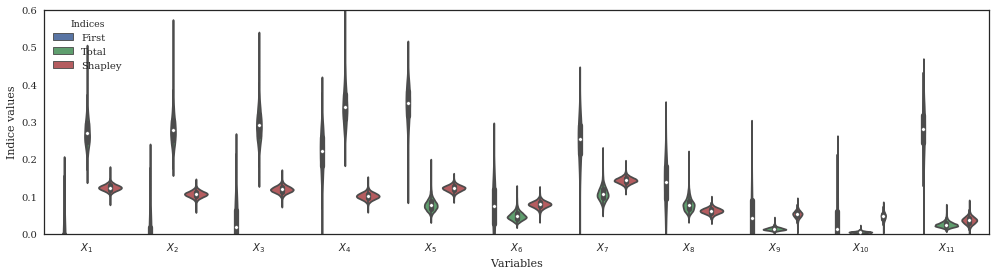

In [30]:
ylim = [0.0, 0.6]
fig, ax = plt.subplots(figsize=(14, 4))
plot_sensitivity_results(shapley_kriging_results, indice='all', ax=ax)
ax.set_ylim(ylim)
fig.tight_layout()
fig.savefig('./output/results_%s_Nv_%d_Ni_%d_No_%d_Nperms_%d.pdf' % (library, Nv, Ni, No, n_perms))

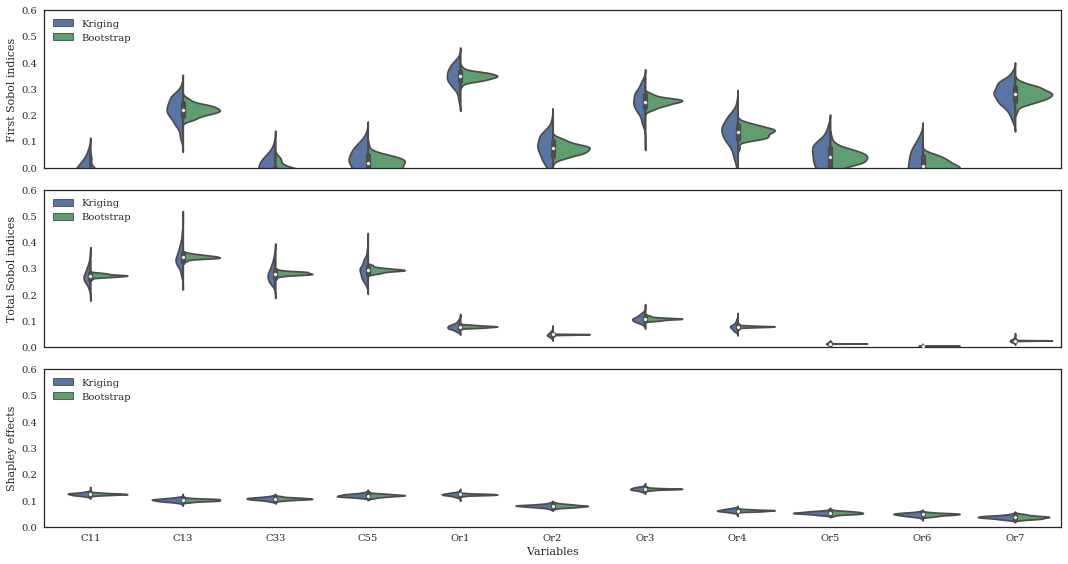

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharex=True, sharey=True)

ax = axes[0]
plot_sensitivity_results(shapley_kriging_results, indice='first', ax=ax)
ax.set_ylim(ylim)
ax.set_xlabel('')
ax.set_ylabel('First Sobol indices')
ax.legend(loc=2)

ax = axes[1]
plot_sensitivity_results(shapley_kriging_results, indice='total', ax=ax)
ax.set_ylim(ylim)
ax.legend(loc=2)
ax.set_xlabel('')
ax.set_ylabel('Total Sobol indices')

ax = axes[2]
plot_sensitivity_results(shapley_kriging_results, indice='shapley', ax=ax)
ax.set_ylim(ylim)
ax.legend(loc=2)
ax.set_ylabel('Shapley effects')

fig.tight_layout()
fig.savefig('./output/vars_results_%s_Nv_%d_Ni_%d_No_%d_Nperms_%d.pdf' % (library, Nv, Ni, No, n_perms))